In [1]:
from preprocessing import *

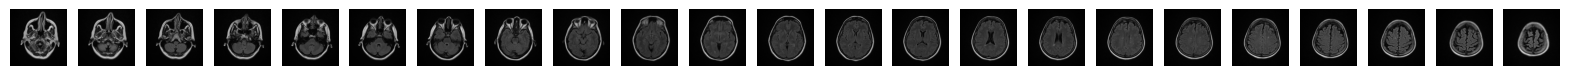

In [2]:
train_folder = "data/train"
nii_files_list = load_nii_files(train_folder)
display_all_slices(nii_files_list[0])

### Preprocessing Notes

Things to consider while re-sizing the images, to prevent loss of detail and that lesion masks still match the input images:
- **Interpolation Method**: Use appropriate interpolation methods. For the MRI scans (grayscale images), you can use bilinear or bicubic interpolation. For the segmentation masks (binary images), use nearest-neighbor interpolation to avoid introducing intermediate pixel values.
- **Aspect Ratio**: Maintain the aspect ratio if possible to prevent distortion, which can affect the model's performance. If the aspect ratio needs to change, ensure that the lesions are still distinguishable in the resized images.

**Normalization and Preprocessing**:
- **Intensity Normalization**: MRI scans often require intensity normalization (e.g., z-score normalization) to standardize the pixel values across different scans and machines. Ensure this is consistent across your dataset before feeding the images into the model.
- **Lesion Masks**: Ensure that your lesion masks are binary (i.e., 0 for background and 1 for lesions) and are aligned with the resized MRI images. If you perform any augmentation (e.g., rotation, flipping), apply the same transformations to both the MRI scans and the corresponding masks.

**Data Augmentation**:
- Make sure that it is applied to MRI data and masks

**Alignment of Images and Labels**:
- **Ensure Alignment**: It is critical that the MRI scans and the lesion masks are perfectly aligned. Even slight misalignment can lead to poor model performance. Verify that the resizing, augmentation, or any other preprocessing step maintains this alignment.
- **Image and Mask File Pairs**: Since your lesions are in different image files, make sure each MRI scan is paired correctly with its corresponding lesion mask file. Automating this step during data loading can prevent mistakes.

# Processing Pipeline

In [3]:
all_data_train = load_all_data(nii_files_list)
images_train, masks_train = separate_images_masks(all_data_train)

In [4]:
resized_images_train = resize_all_images(images_train)
resized_masks_train = resize_all_images(masks_train)

# assert that the shapes are the same in mask and scan (x and y dimensions)
for image, mask in zip(resized_images_train, resized_masks_train):
    assert image.shape[:-1] == mask.shape[:-1]

In [5]:
# Apply the filtering function
filtered_mri_images, filtered_masks = filter_slices_with_lesions(resized_images_train, resized_masks_train)

# Output the number of slices remaining for each scan after filtering
for i, (filtered_image, filtered_mask) in enumerate(zip(filtered_mri_images, filtered_masks)):
    print(f"Scan {i + 1}: {filtered_image.shape[-1]} slices remaining, corresponding mask shape: {filtered_mask.shape}")

Scan 1: 13 slices remaining, corresponding mask shape: (256, 256, 13)
Scan 2: 10 slices remaining, corresponding mask shape: (256, 256, 10)
Scan 3: 12 slices remaining, corresponding mask shape: (256, 256, 12)
Scan 4: 10 slices remaining, corresponding mask shape: (256, 256, 10)
Scan 5: 16 slices remaining, corresponding mask shape: (256, 256, 16)
Scan 6: 12 slices remaining, corresponding mask shape: (256, 256, 12)
Scan 7: 7 slices remaining, corresponding mask shape: (256, 256, 7)
Scan 8: 13 slices remaining, corresponding mask shape: (256, 256, 13)
Scan 9: 4 slices remaining, corresponding mask shape: (256, 256, 4)
Scan 10: 13 slices remaining, corresponding mask shape: (256, 256, 13)
Scan 11: 14 slices remaining, corresponding mask shape: (256, 256, 14)
Scan 12: 7 slices remaining, corresponding mask shape: (256, 256, 7)
Scan 13: 19 slices remaining, corresponding mask shape: (256, 256, 19)
Scan 14: 13 slices remaining, corresponding mask shape: (256, 256, 13)
Scan 15: 12 slices re

In [6]:
# sum up total nr of slices
total_slices = sum([image.shape[-1] for image in filtered_mri_images])
print(f"Total slices: {total_slices}")

Total slices: 427


In [7]:
# repeat for unfiltred images
total_slices_unfiltered = sum([image.shape[-1] for image in resized_images_train])
print(f"Total slices unfiltered: {total_slices_unfiltered}")

Total slices unfiltered: 828


In [8]:
normalized_images_train = normalize_images(filtered_mri_images)
#normalized_masks_train = normalize_images(filtered_masks)